## Linear Discriminant Analysis
### Material Based on Introduction to Statistical Learning, Tibshirani, Hastie, James

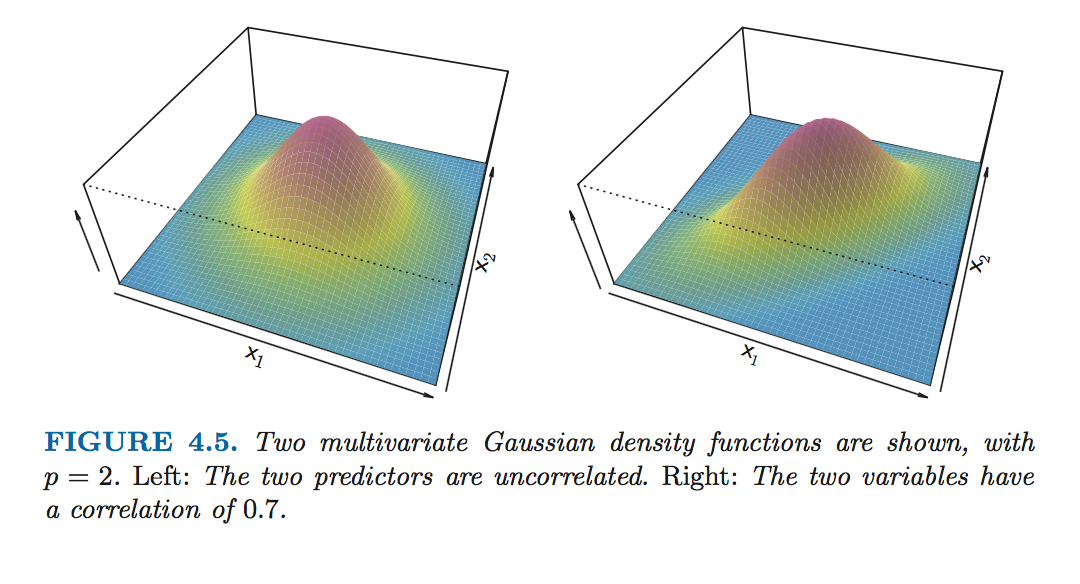

In [46]:
from IPython.display import Image
Image(filename='lda.png')

### the LDA classifier results from assuming that the observations within each class come from a normal distribution with a class-specific mean vector and a common variance σ2, and plugging estimates for these parameters into the Bayes classifier.

In [44]:
!pwd

/Users/jam3jam/dsi/PYTHON_ISL/ISLR-python/Notebooks


In [27]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

In [28]:

# In R, I exported the dataset from package 'ISLR' to an Excel file
df = pd.read_excel('Data/Default.xlsx')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

  default student      balance        income  default2  student2
1      No      No   729.526495  44361.625074         0         0
2      No     Yes   817.180407  12106.134700         0         1
3      No      No  1073.549164  31767.138947         0         0

In [29]:
X = df[['balance', 'income', 'student2']].as_matrix()
y = df.default2.as_matrix()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status         No  Yes
Predicted default status           
No                        9645  254
Yes                         22   79

In [30]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

             precision    recall  f1-score   support

         No       0.97      1.00      0.99      9667
        Yes       0.78      0.24      0.36       333

avg / total       0.97      0.97      0.97     10000



### Table 4.5
Instead of using the probability of 50% as decision boundary, we say that a probability of default of 20% is to be classified as 'Yes'.

In [31]:
decision_prob = 0.2
y_prob = lda.fit(X, y).predict_proba(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob[:,1] > decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status         No  Yes
Predicted default status           
No                        9435  140
Yes                        232  193

#  Lab

### 4.6.3 Linear Discriminant Analysis

In [32]:
df = pd.read_csv('Data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)

In [33]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

In [34]:
lda.priors_

array([ 0.49198397,  0.50801603])

In [35]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [42]:
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [37]:
confusion_matrix(y_test, pred).T

array([[ 35,  35],
       [ 76, 106]])

In [38]:
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

       Down      0.500     0.315     0.387       111
         Up      0.582     0.752     0.656       141

avg / total      0.546     0.560     0.538       252



In [39]:
pred_p = lda.predict_proba(X_test)

In [40]:
np.unique(pred_p[:,1]>0.5, return_counts=True)

(array([False,  True], dtype=bool), array([ 70, 182]))

In [41]:
np.unique(pred_p[:,1]>0.9, return_counts=True)

(array([False], dtype=bool), array([252]))

### 4.6.4 Quadratic Discriminant Analysis

In [20]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [21]:
qda.priors_

array([ 0.49198397,  0.50801603])

In [22]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [23]:
confusion_matrix(y_test, pred).T

array([[ 30,  20],
       [ 81, 121]])

In [24]:
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

       Down      0.600     0.270     0.373       111
         Up      0.599     0.858     0.706       141

avg / total      0.599     0.599     0.559       252



### 4.6.5 K-Nearest Neighbors

In [25]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[43 58]
 [68 83]]
             precision    recall  f1-score   support

       Down      0.426     0.387     0.406       111
         Up      0.550     0.589     0.568       141

avg / total      0.495     0.500     0.497       252



In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[48 55]
 [63 86]]
             precision    recall  f1-score   support

       Down      0.466     0.432     0.449       111
         Up      0.577     0.610     0.593       141

avg / total      0.528     0.532     0.529       252

